In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import confusion_matrix, mean_absolute_error
from sklearn import svm
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from IPython.core.interactiveshell import InteractiveShell

# for plotting:
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
df = pd.read_excel(r'C:\Users\Big data\Desktop\class\funcardproject\data\DB104-Roland01\Data_去除薪資0.xlsx',encoding='utf-16')
df.head(10)

,Unnamed: 0,age,serveTime,credLimit,Loan,SalPerY,holdCard,Career
0,1579,30.0,0.0,2000,NaN,20000,1,2
1,887,22.0,11.0,20000,NaN,30000,0,1
2,1909,22.0,11.0,20000,NaN,30000,0,1
3,688,38.0,12.0,300000,0.0,35000,1,2
4,1710,39.0,13.0,300000,0.0,40000,1,2
5,97,25.0,3.0,80000,0.0,50000,1,2
6,1925,NaN,24.0,50000,1.0,60000,0,2
7,698,23.0,12.0,20000,1.0,75000,0,2
8,430,23.0,36.0,20000,0.0,90000,1,1
9,431,23.0,36.0,20000,0.0,90000,1,1


In [80]:
from impyute.imputation.cs import fast_knn
from impyute.imputation.cs import mice
from sklearn.preprocessing import Imputer
#mice_rf補值
df_mice_rf_group = mice(df,meth='rf')
df_mice_rf_group.columns=["num","age","serveTime","credLimit","Loan","SalPerY","holdCard","Career"]

C:\ProgramData\Anaconda3\lib\site-packages\impyute\util\preprocess.py:52: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  args[0] = args[0].as_matrix()


# 若要分群,有2個考量點:
   ## １.分界點必須選在稀疏區(明顯斷層,否則會模稜兩可)
   ##  2.每個區段樣本數不能過少或是數量差異過大
# 分群採用:
# 2W(含)W~4.5W(含)#因為學生很容易斷出來
# 4.5W~9.5W(含)
# 9.5W到19.5W(含)
# 19.5W以上到29.5W(含)
# 29.5W以上
# 一共五類
# 不一定要這樣分,根據經驗僅供參考

In [40]:
df_group=df
df_group.loc[(df_group['credLimit'] >= 10) & (df_group['credLimit'] <=45000),'credLimit_group']=0
df_group.loc[(df_group['credLimit'] > 45000) & (df_group['credLimit'] <=95000),'credLimit_group']=1
df_group.loc[(df_group['credLimit'] > 95000) & (df_group['credLimit'] <=145000),'credLimit_group']=2
df_group.loc[(df_group['credLimit'] > 145000) & (df_group['credLimit'] <=195000),'credLimit_group']=3
# df_group.loc[(df_group['credLimit'] > 195000) & (df_group['credLimit'] <=245000),'credLimit_group']=3
# df_group.loc[(df_group['credLimit'] > 245000) & (df_group['credLimit'] <=295000),'credLimit_group']=3
# df_group.loc[(df_group['credLimit'] > 295000) & (df_group['credLimit'] <=345000),'credLimit_group']=3
# df_group.loc[(df_group['credLimit'] > 345000) & (df_group['credLimit'] <=395000),'credLimit_group']=3
# df_group.loc[(df_group['credLimit'] > 395000) & (df_group['credLimit'] <=445000),'credLimit_group']=3
# df_group.loc[(df_group['credLimit'] > 445000) & (df_group['credLimit'] <=495000),'credLimit_group']=3
# df_group.loc[(df_group['credLimit'] > 150000) & (df_group['credLimit'] <=200000),'credLimit_group']=3
# df_group.loc[(df_group['credLimit'] > 150000) & (df_group['credLimit'] <=200000),'credLimit_group']=3
# df_group.loc[(df_group['credLimit'] > 150000) & (df_group['credLimit'] <=200000),'credLimit_group']=3
# df_group.loc[(df_group['credLimit'] > 250000) ,'credLimit_group']=4

In [81]:
df_group=df_mice_rf_group
a=0
for i in range(20):
    df_group.loc[(df_group['credLimit'] >= a) & (df_group['credLimit'] <=a+50000),'credLimit_group']=float(i)
    a+=50000

In [82]:
df_group

,num,age,serveTime,credLimit,Loan,SalPerY,holdCard,Career,credLimit_group
0,1579.0,30.000000,0.000000,2000.0,0.505574,20000.0,1.0,2.0,0.0
1,887.0,22.000000,11.000000,20000.0,0.212559,30000.0,0.0,1.0,0.0
2,1909.0,22.000000,11.000000,20000.0,0.254668,30000.0,0.0,1.0,0.0
3,688.0,38.000000,12.000000,300000.0,0.000000,35000.0,1.0,2.0,6.0
4,1710.0,39.000000,13.000000,300000.0,0.000000,40000.0,1.0,2.0,6.0
5,97.0,25.000000,3.000000,80000.0,0.000000,50000.0,1.0,2.0,1.0
6,1925.0,25.615585,24.000000,50000.0,1.000000,60000.0,0.0,2.0,1.0
7,698.0,23.000000,12.000000,20000.0,1.000000,75000.0,0.0,2.0,0.0
8,430.0,23.000000,36.000000,20000.0,0.000000,90000.0,1.0,1.0,0.0
9,431.0,23.000000,36.000000,20000.0,0.000000,90000.0,1.0,1.0,0.0


C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'sequence')

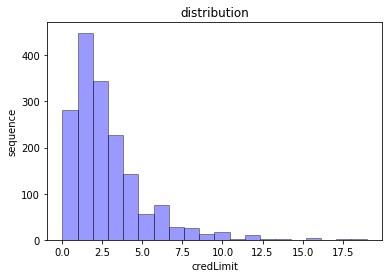

In [83]:
#在檢視一次樣本,各個級數數量並無差太多,應該可以?
sns.distplot(df_group['credLimit_group'], hist=True, kde=False, 
             bins=int(20), color = 'blue',
             hist_kws={'edgecolor':'black'})
plt.title('distribution')
plt.xlabel('credLimit')
plt.ylabel('sequence')

In [28]:
df_mice_rf_group['credLimit_group']=df_mice_rf_group['credLimit_group'].astype('str')

In [84]:
df_mice_rf_group.to_excel(r"C:\Users\Big data\Desktop\class\funcardproject\斷詞與和卡額度_20群.xls")

In [86]:
df_mice_rf_group['credLimit_group']=df_mice_rf_group['credLimit_group'].astype('int')
df_mice_rf_group

ValueError: invalid literal for int() with base 10: '0.0'